<a href="https://colab.research.google.com/github/shoryasethia/QF_WiDS/blob/main/MLP1_AsianPaints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [1]:
# Hyperparams
n_units = 400
layers = 4
n_batch = 1024
n_epochs = 20

In [7]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

file_name = list(uploaded.keys())[0]

df = pd.read_excel(file_name)

Saving ASIANPAINT_Dataset.xlsx to ASIANPAINT_Dataset (1).xlsx


In [8]:
df.head()

,Date,Expiry,t,strike_price,underlying_value,sigma,r,close
0,2020-01-01,2020-01-30,29,1980,1793.2,0.008151,0.0494,3.8
1,2020-01-01,2020-01-30,29,1440,1793.2,0.008151,0.0494,398.5
2,2020-01-01,2020-01-30,29,2020,1793.2,0.008151,0.0494,1.2
3,2020-01-01,2020-01-30,29,1920,1793.2,0.008151,0.0494,6.5
4,2020-01-01,2020-01-30,29,1940,1793.2,0.008151,0.0494,5.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35591 entries, 0 to 35590
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              35591 non-null  datetime64[ns]
 1   Expiry            35591 non-null  datetime64[ns]
 2   t                 35591 non-null  int64         
 3   strike_price      35591 non-null  int64         
 4   underlying_value  35591 non-null  float64       
 5   sigma             35591 non-null  float64       
 6   r                 35591 non-null  float64       
 7   close             35591 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(2)
memory usage: 2.2 MB


In [10]:
df.describe()

,t,strike_price,underlying_value,sigma,r,close
count,35591.000000,35591.000000,35591.000000,35591.000000,35591.000000,35591.000000
mean,43.975499,1837.912394,1970.402544,0.019941,0.035962,207.026833
std,26.347567,353.981841,309.650698,0.008570,0.007311,175.737167
min,0.000000,1300.000000,1498.450000,0.007787,0.029300,0.050000
25%,21.000000,1560.000000,1724.250000,0.015889,0.031500,57.900000
50%,43.000000,1800.000000,1891.300000,0.017918,0.032500,166.150000
75%,66.000000,2040.000000,2166.550000,0.019862,0.035200,324.750000
max,97.000000,3140.000000,2764.500000,0.052411,0.052800,1360.000000


**Convert timestamp columns to numerical values**


In [11]:
df['Date'] = pd.to_datetime(df['Date']).astype(int)
df['Expiry'] = pd.to_datetime(df['Expiry']).astype(int)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['close'], axis=1), df['close'], test_size=0.01, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Normalize target variable 'close'
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))

**Building the model**

In [13]:
model = Sequential()
model.add(Dense(n_units, input_dim=X_train_scaled.shape[1]))
model.add(LeakyReLU())

for _ in range(layers - 1):
    model.add(Dense(n_units))
    model.add(LeakyReLU())

model.add(Dense(1, activation='linear'))  # Use linear activation for regression problems

# Choose a different learning rate
model.compile(loss='mse', optimizer=Adam(learning_rate=1e-4))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               3200      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 400)               0         
                                                                 
 dense_1 (Dense)             (None, 400)               160400    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 400)               0         
                                                                 
 dense_2 (Dense)             (None, 400)               160400    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 400)               1

**Trianing the model**

In [15]:
history = model.fit(X_train_scaled, y_train_scaled,
                    batch_size=n_batch, epochs=n_epochs,
                    validation_split=0.01,
                    callbacks=[TensorBoard()],
                    verbose=1)

Epoch 1/20
35/35 [==============================] - 3s 68ms/step - loss: 0.4434 - val_loss: 0.1488
Epoch 2/20
35/35 [==============================] - 2s 59ms/step - loss: 0.1452 - val_loss: 0.1096
Epoch 3/20
35/35 [==============================] - 3s 93ms/step - loss: 0.1185 - val_loss: 0.0950
Epoch 4/20
35/35 [==============================] - 2s 71ms/step - loss: 0.1064 - val_loss: 0.0874
Epoch 5/20
35/35 [==============================] - 2s 58ms/step - loss: 0.0982 - val_loss: 0.0822
Epoch 6/20
35/35 [==============================] - 2s 58ms/step - loss: 0.0919 - val_loss: 0.0804
Epoch 7/20
35/35 [==============================] - 2s 59ms/step - loss: 0.0862 - val_loss: 0.0745
Epoch 8/20
35/35 [==============================] - 2s 59ms/step - loss: 0.0809 - val_loss: 0.0707
Epoch 9/20
35/35 [==============================] - 3s 97ms/step - loss: 0.0762 - val_loss: 0.0706
Epoch 10/20
35/35 [==============================] - 2s 62ms/step - loss: 0.0728 - val_loss: 0.0592
Epoch 11/

In [16]:
model.save('MLP1-AsianPaints.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)
y_pred_rescaled = y_scaler.inverse_transform(y_pred)  # Inverse transform predictions
test_mse = np.mean(np.square(y_test - np.reshape(y_pred_rescaled, y_pred_rescaled.shape[0])))
print('Test set MSE:', test_mse)


12/12 [==============================] - 0s 2ms/step
Test set MSE: 1582.2841109196129


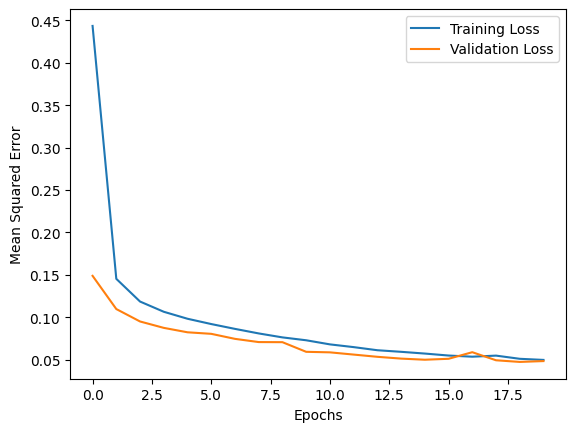

In [18]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()